-  Problem Statement : To predict the Average price of an avocado in future.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
avocado = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [3]:
# Copy the original dataset to another object
df = avocado.copy()

In [4]:
# Show the first five rows of the dataframe
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
# Show the last five rows of the dataframe
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Show the dimension of the dataframe
print('The Shape of the Dataset is : ',df.shape)

The Shape of the Dataset is :  (16468, 14)


- In the dataset there are only have 16468 rows and 14 columns.

In [7]:
# Show the data types of the dataframe
print('The datatypes are : \n' + '*'*20)
print(df.dtypes)

The datatypes are : 
********************
Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object


- here 'Unnamed: 0' columns are not necessary so we can drop it.
  - The Date column has object datatypes so need to change the format in datetime.
     - We observe the year column has float datatype so need to change types.

In [8]:
# drop unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Change the date format
df['Date'] = pd.to_datetime(df['Date'])

Feature Engineering

In [10]:
# Extract day, month, and year from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [11]:
# Set the Date column as an index
df.set_index('Date', inplace=True)

In [12]:
# Show the columns
df.columns.to_list()

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region',
 'Day',
 'Month']

In [13]:
# To check the missing value
print('Total Missing Values are : \n' + '*'*25)
print(df.isnull().sum())

Total Missing Values are : 
*************************
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
Day             14951
Month           14951
dtype: int64


- Here the large number of NaN values , so we can drop the null values.

In [14]:
df.dropna(inplace=True)

In [15]:
# Change the column datatype from float to int
df['year']=df['year'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)

In [16]:
df.type.value_counts()

conventional    1517
Name: type, dtype: int64

- We observe that in our dataset only one avocado type is present.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2015-12-27 to 2016-09-18
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   int32  
 11  region        1517 non-null   object 
 12  Day           1517 non-null   int32  
 13  Month         1517 non-null   int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 160.0+ KB


In [18]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
Date,,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12


In [19]:
# Again check missing value is present or not after imputation
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Day             0
Month           0
dtype: int64

- Observe that there is no null value exist in our dataset.

In [20]:
# Again check the datatypes
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int32
region           object
Day               int32
Month             int32
dtype: object

In [21]:
# To check the duplicate value
print('Number of Duplicate Rows are : \n' + '*'*27)
print(df.duplicated().sum())

Number of Duplicate Rows are : 
***************************
0


- By observation there do not have any duplicated value in our dataset

In [22]:
# To check the unique value
print('The Unique Values are : \n' + '*'*25)
df.nunique().to_frame('No. of unique value')

The Unique Values are : 
*************************


,No. of unique value
AveragePrice,113
Total Volume,1517
4046,1517
4225,1517
4770,1516
Total Bags,1517
Small Bags,1517
Large Bags,1377
XLarge Bags,711
type,1


- Here we observe that the type is same for entire dataset.Therefore it is not require for model bulid.Now can drop it. 

In [23]:
df.drop(columns=['type','Total Bags'],axis=1,inplace=True)

In [24]:
# Show the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1517 entries, 2015-12-27 to 2016-09-18
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Small Bags    1517 non-null   float64
 6   Large Bags    1517 non-null   float64
 7   XLarge Bags   1517 non-null   float64
 8   year          1517 non-null   int32  
 9   region        1517 non-null   object 
 10  Day           1517 non-null   int32  
 11  Month         1517 non-null   int32  
dtypes: float64(8), int32(3), object(1)
memory usage: 136.3+ KB


In [25]:
# Show the statistical summary of data
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.487736e+05,4.264205e+04,2181.771074,2015.162821,15.253790,6.362558
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,8.965902,3.472146
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,2.972722e+04,5.407400e+02,0.000000,2015.000000,7.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,6.237569e+04,5.044350e+03,0.000000,2015.000000,15.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.461994e+05,2.926767e+04,401.480000,2015.000000,22.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,31.000000,12.000000


We observe,
  - in statistical summary the count of all columns are same i.e there is no missing value present.
     - The average price of avocado is 1.075 and maximum average price is 1.60.
        - It shows a right skewness in most of the column.
          - It shows the outlier may be present in dataset.

# EDA

In [26]:
sns.set(style='dark',font_scale=1.2)
sns.set(rc={'axes.facecolor':'#ADD8E6','figure.facecolor':'#87CEEB'})
sns.set_context('poster',font_scale = .4)

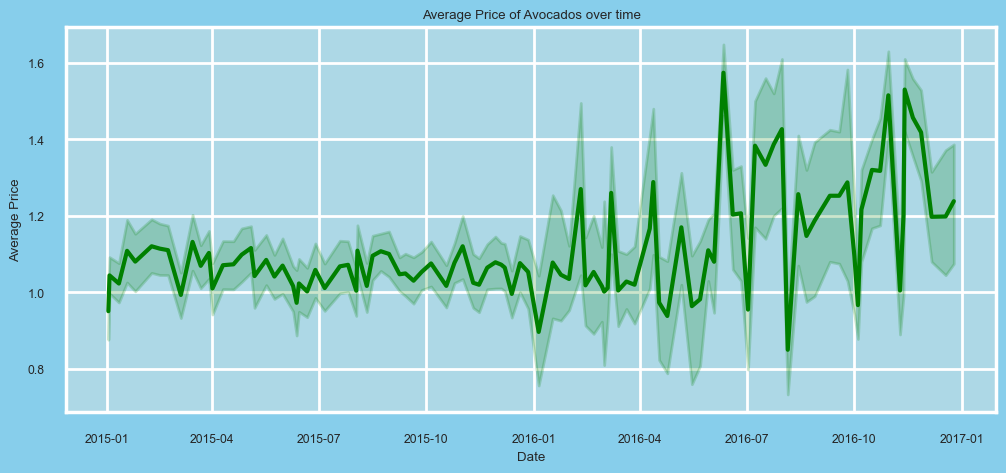

In [27]:
# Sales Trends 
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='AveragePrice', data=df, color='green')
plt.title('Average Price of Avocados over time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

We observe,
   -  The plot of average avocado prices over time shows both trends and fluctuations, indicating that prices vary across different times of the year. 

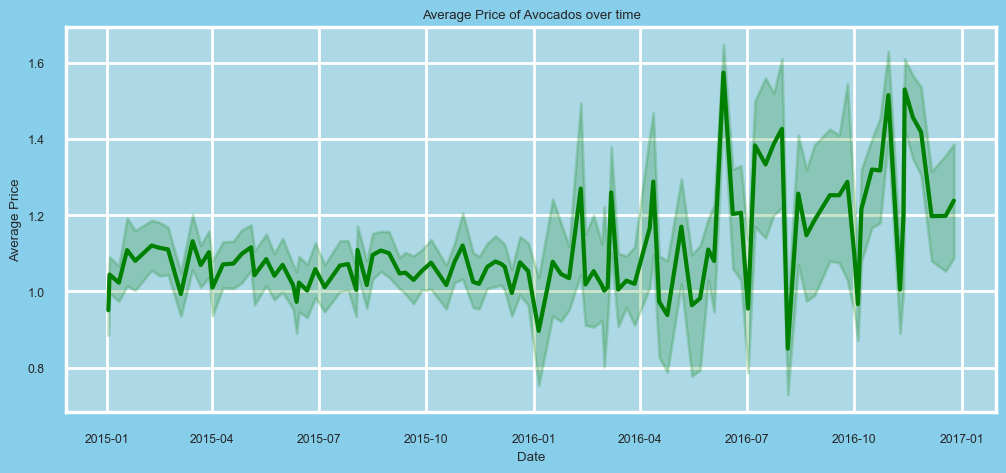

In [28]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='AveragePrice', data=df, color='green')
plt.title('Average Price of Avocados over time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

In [29]:
# we check the yearly average price of avocado
avg_y = df.groupby('year')['AveragePrice'].mean().reset_index()
avg_y

,year,AveragePrice
0,2015,1.060110
1,2016,1.151498


In [30]:
# we check the monthly average price of avocado
avg_m = df.groupby('Month')['AveragePrice'].sum().reset_index()
avg_m

,Month,AveragePrice
0,1,145.92
1,2,110.54
2,3,168.58
3,4,132.87
4,5,171.35
5,6,140.35
6,7,94.45
7,8,168.14
8,9,97.75
9,10,107.84


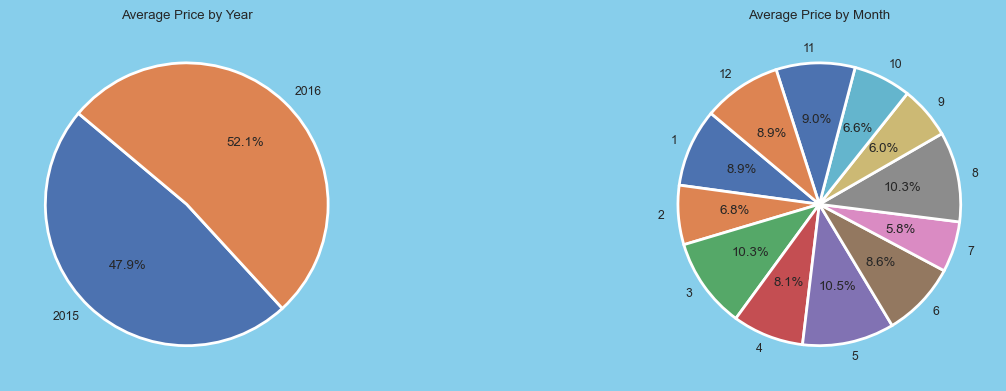

In [31]:
figure, axs = plt.subplots(1, 2, figsize=(15, 4))

# First pie chart
axs[0].pie(avg_y['AveragePrice'], labels=avg_y['year'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Average Price by Year')

# Second pie chart
axs[1].pie(avg_m['AveragePrice'], labels=avg_m['Month'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Average Price by Month')

plt.tight_layout()
plt.show()

In [32]:
# we check the yearly total sale of avocado
df_1 = df.groupby('year')['Total Volume'].sum().reset_index()
df_1

,year,Total Volume
0,2015,2.044783e+09
1,2016,3.852675e+08


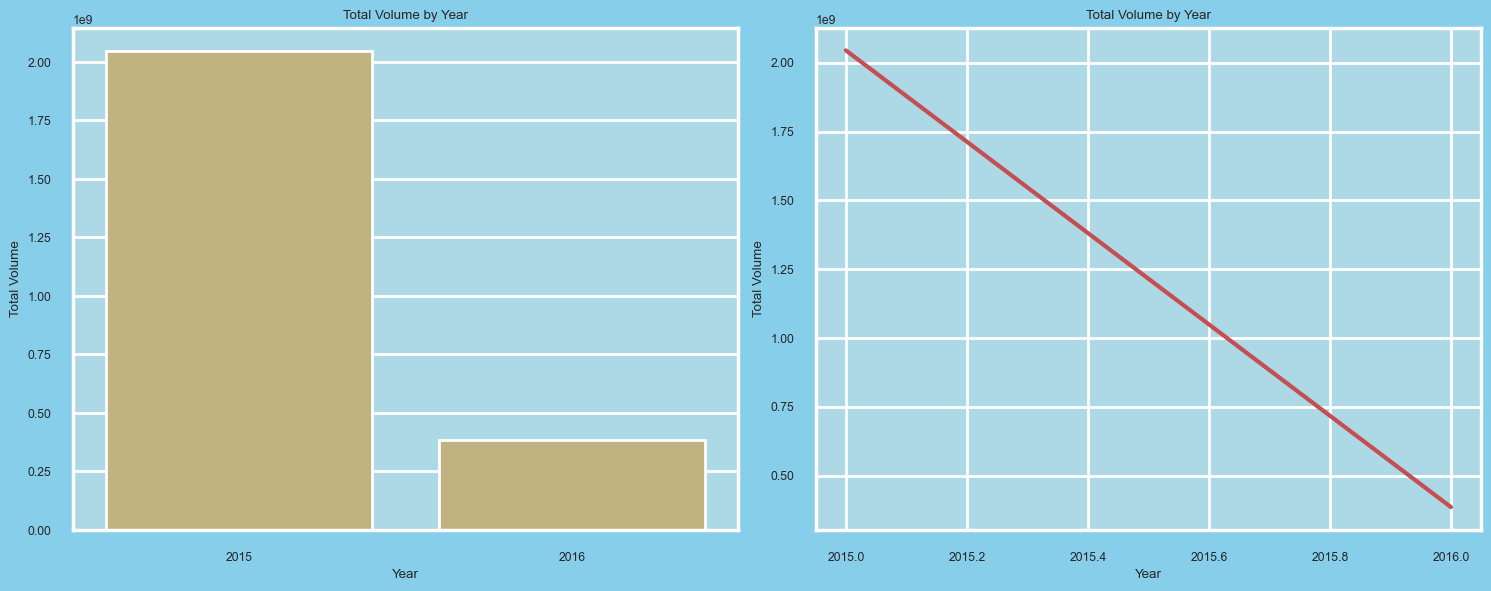

In [33]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='year', y='Total Volume', data=df_1, color='y', ax=axs[0])
axs[0].set_title('Total Volume by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Total Volume')

sns.lineplot(x='year', y='Total Volume', data=df_1, color='r', ax=axs[1], markers='*')
axs[1].set_title('Total Volume by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Total Volume')

plt.tight_layout()
plt.show()

- We observe that the sales is high in 2015 years as compared to 2016.
- We see that the trends is sharply decreased from 2015 to 2016.

In [34]:
# we check the monthly total sale of avocado
df_2 = df.groupby('Month')['Total Volume'].sum().to_frame()
df_2

,Total Volume
Month,
1,2.709289e+08
2,1.518207e+08
3,2.864619e+08
4,2.225624e+08
5,3.212220e+08
6,2.382439e+08
7,1.610989e+08
8,2.255813e+08
9,1.026004e+08


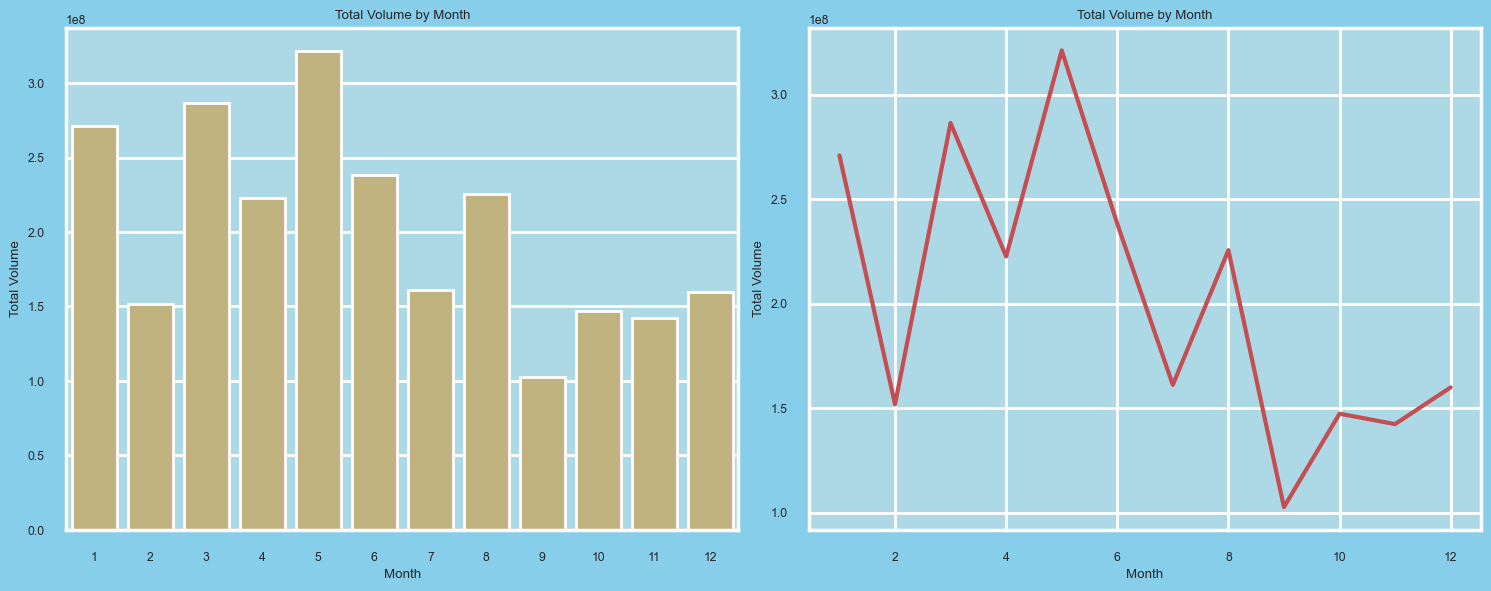

In [35]:
figure, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='Month', y='Total Volume', data=df_2, color='y', ax=axs[0])
axs[0].set_title('Total Volume by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Volume')

sns.lineplot(x='Month', y='Total Volume', data=df_2, color='r', ax=axs[1], markers='.')
axs[1].set_title('Total Volume by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Volume')

plt.tight_layout()
plt.show()

- We observe that the bar graph shows in month of may is acquire highest sale of avocados.
- the line graphs shows the flactuation of sales in over 12 months, and highest peak is in may month.

In [36]:
# Calculate the highest average avocado price per city
highest_price_region = df.groupby('region')['AveragePrice'].mean().reset_index().sort_values(by='AveragePrice',ascending=False).head(5)
highest_price_region

,region,AveragePrice
46,Syracuse,1.347368
7,Charlotte,1.311613
5,BuffaloRochester,1.301569
30,Philadelphia,1.293846
45,StLouis,1.260000


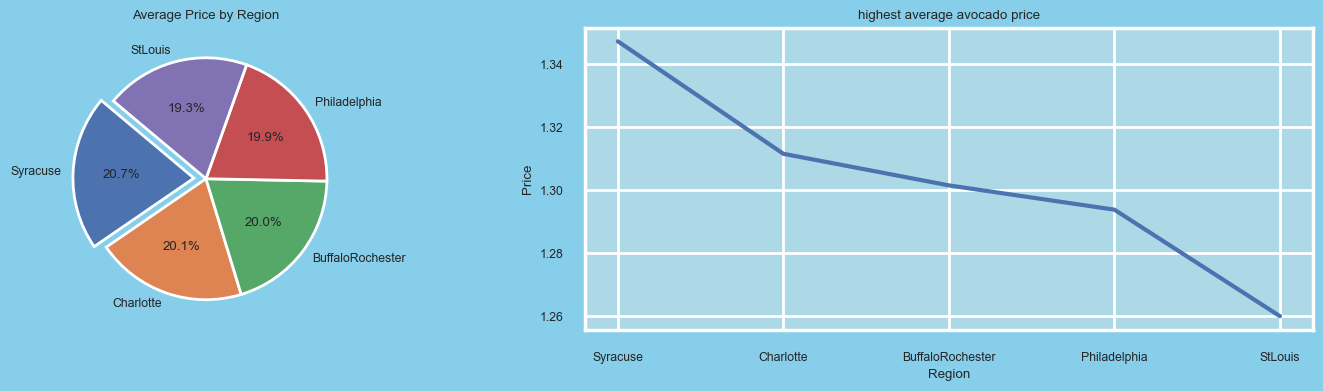

In [37]:
figure, axs = plt.subplots(1, 2, figsize=(15, 4))

# First pie chart
axs[0].pie(highest_price_region['AveragePrice'], labels=highest_price_region['region'], autopct='%1.1f%%', startangle=140, explode = (0.1,0,0,0,0))
axs[0].set_title('Average Price by Region')

sns.lineplot(x='region', y='AveragePrice', data=highest_price_region, color='b', ax=axs[1])
axs[1].set_title('highest average avocado price')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

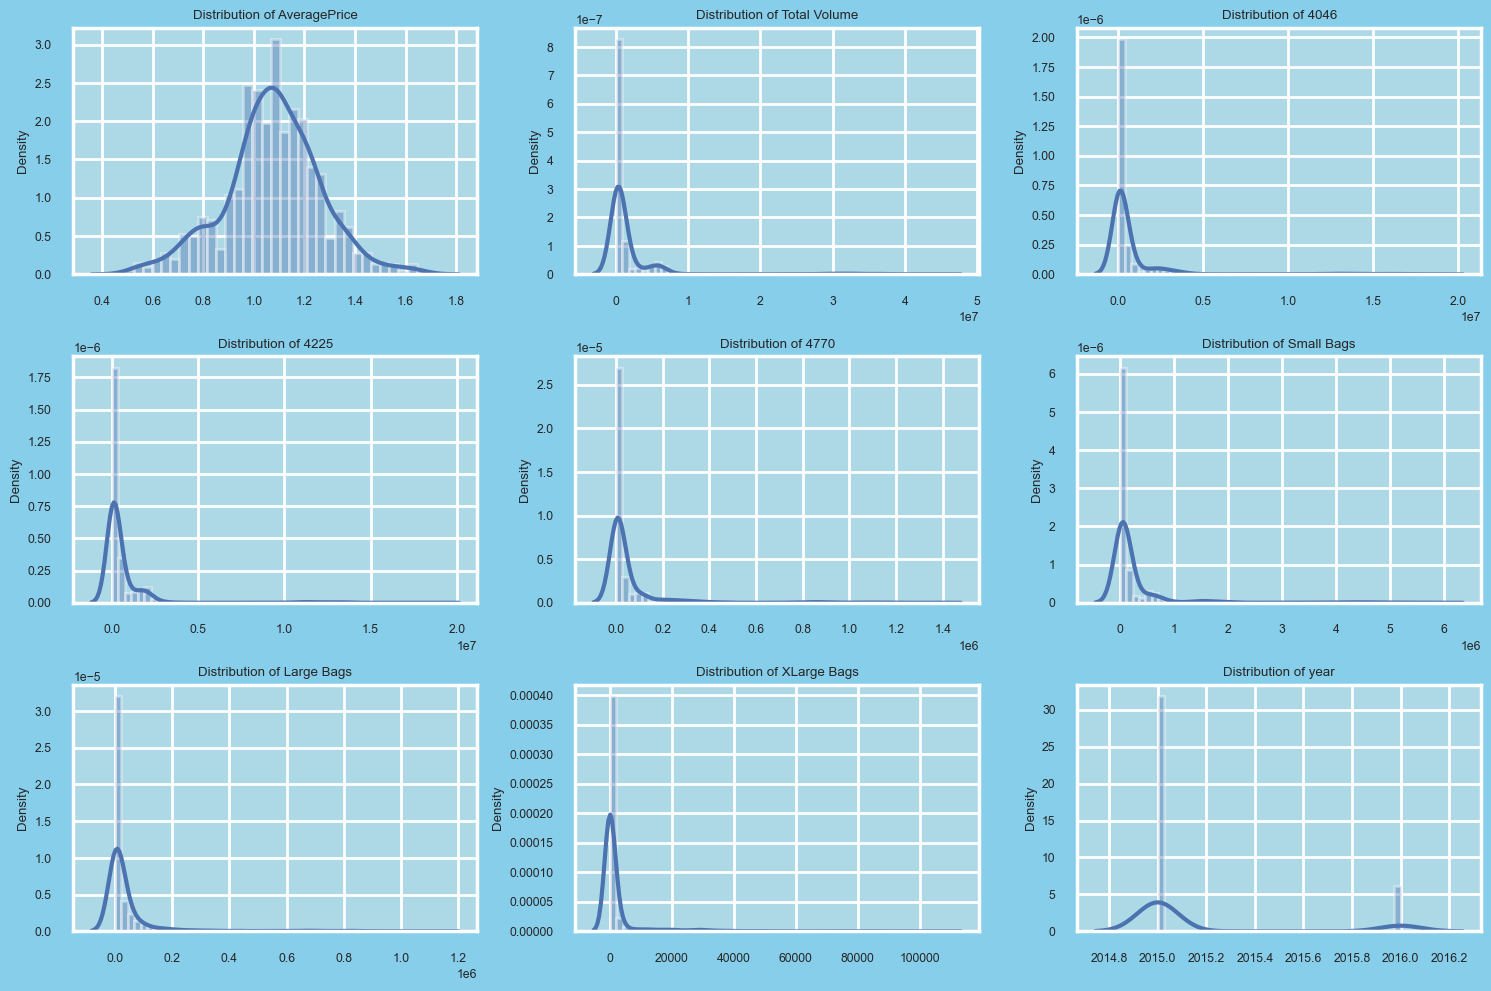

In [38]:
plt.figure(figsize=(15,10))
p=1

for col in df.columns:
    if p < 10:
        ax=plt.subplot(3,3,p)
        sns.distplot(x=df[col])
        plt.title(f'Distribution of {col}')
    p+=1
plt.tight_layout()

- We observe from the above distribution plot it shows extreme right skewness of data.Now we do normal distribution.

# Multivariate Analysis

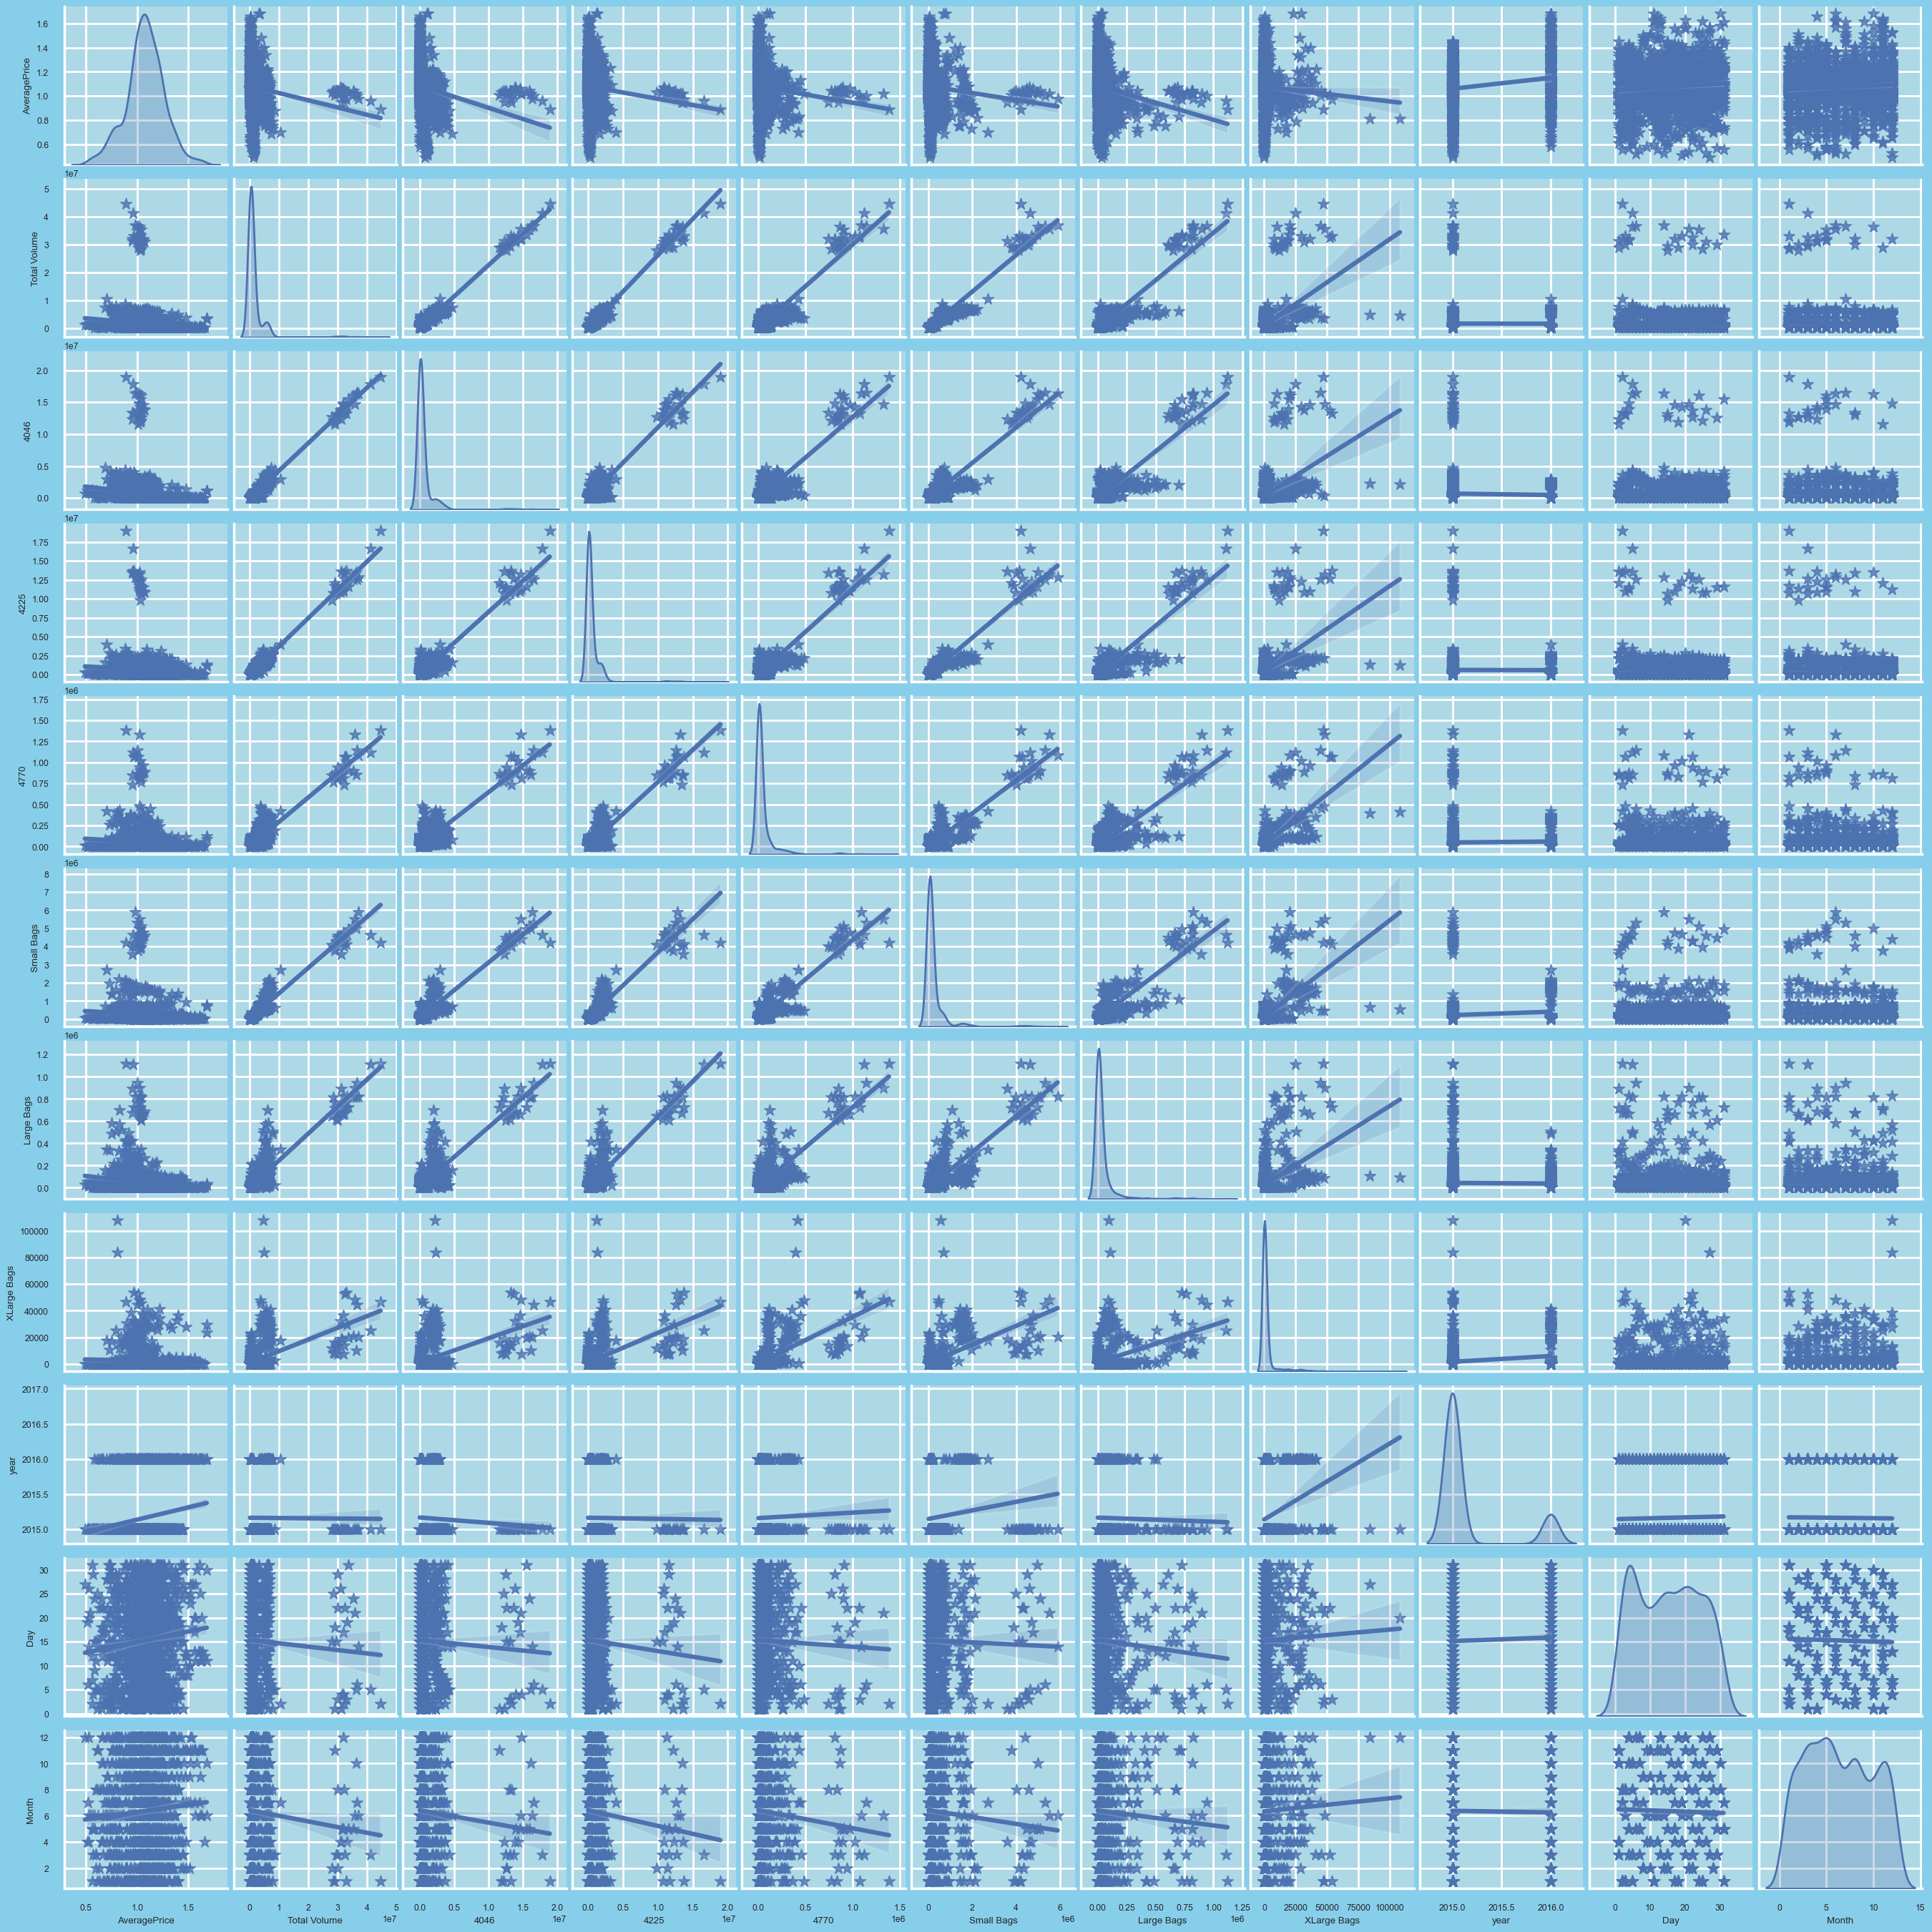

In [39]:
sns.pairplot(df, markers="*", diag_kind='kde', kind='reg', palette='deep')
plt.show()

# Check Correlation using Heat Map

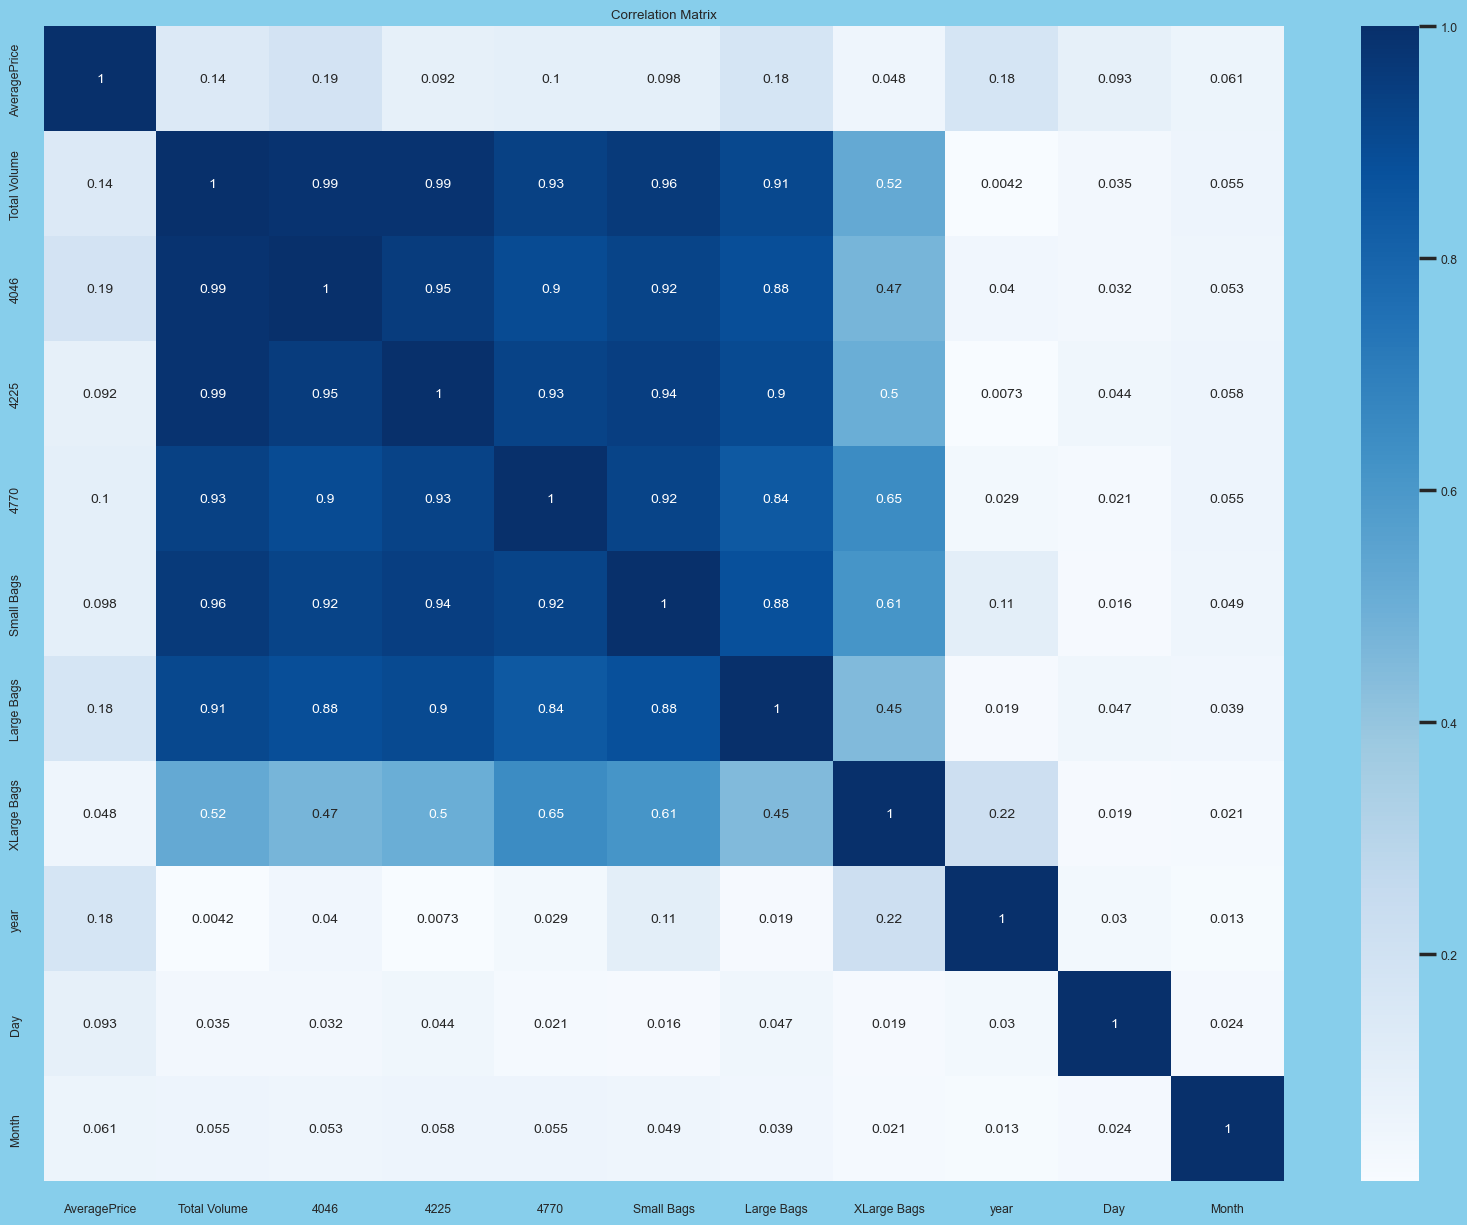

In [40]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size' : 10}, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

- The heat map of correlation matrix shows high multicolinearity with features itself like Total Volume is highly corelated with 4046,4225,4770, small bags, large bags.So we have to drop one column for remove multicolinearity.

# Check Outliers

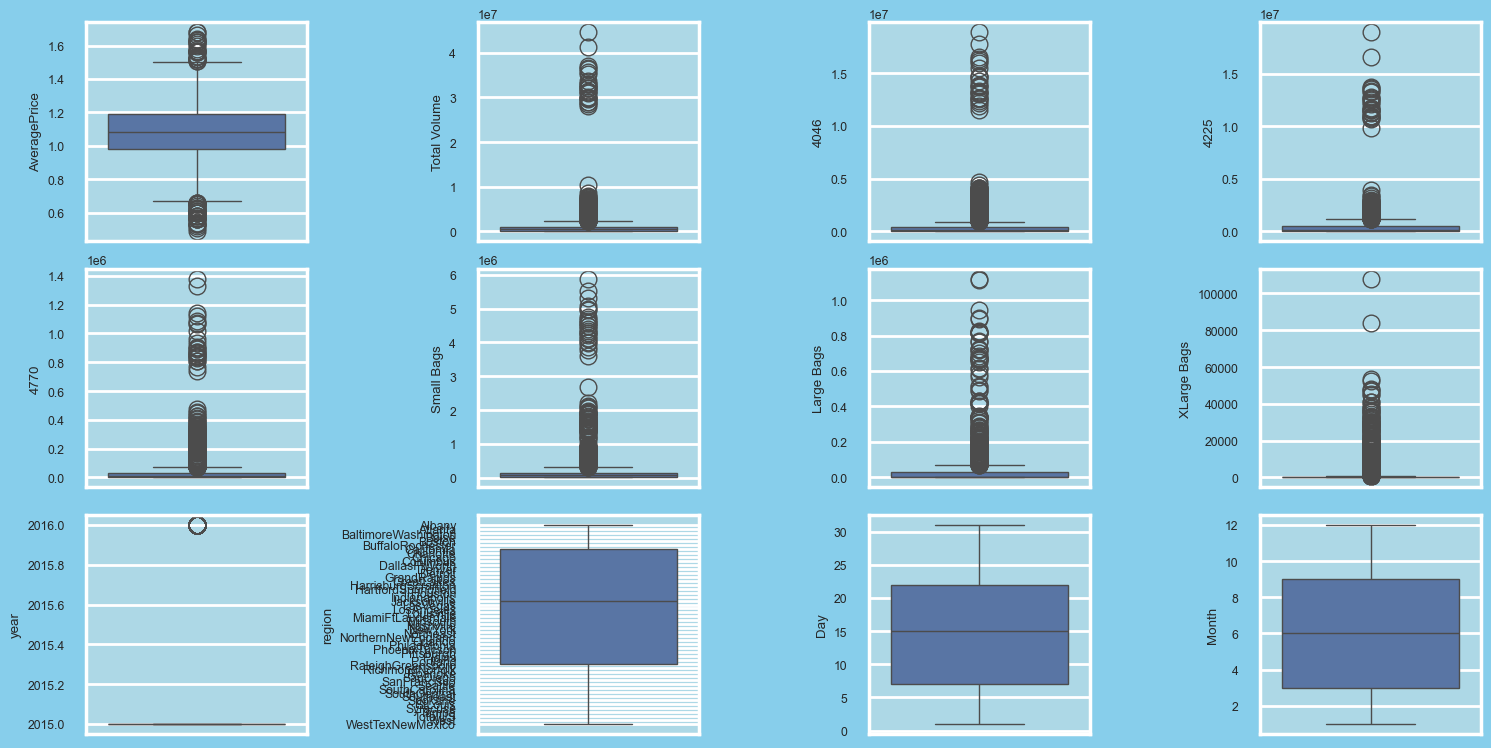

In [41]:
plt.figure(figsize=(15, 10))
p=1
for col in df.columns:
    if p < 16 :
        ax = plt.subplot(4,4,p)
        sns.boxplot(df[col])
    p +=1    
    
plt.tight_layout()

- By the observation of box-plot the dataset have too much extreme value which are not related for model prediction called outlier.
- Now we remove the outlier by using zscore.

In [42]:
from scipy.stats import zscore

from scipy.stats import zscore
col = ['Total Volume','4046','4225','4770','Small Bags','Large Bags','XLarge Bags']
z_score = zscore(df[col])

abs_z_score = np.abs(z_score)

filtering_entry = np.all(abs_z_score < 3, axis=1)

df = df[filtering_entry]

df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Day,Month
count,1439.000000,1.439000e+03,1.439000e+03,1.439000e+03,1439.000000,1.439000e+03,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,1.077596,9.091137e+05,3.609337e+05,3.576393e+05,28782.187199,1.369595e+05,23911.395413,887.658478,2015.147325,15.270327,6.339124
std,0.189771,1.497113e+06,7.547241e+05,5.636506e+05,59048.862626,2.451930e+05,49464.163690,2969.232199,0.354552,8.987313,3.463751
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000,3.311770e+03,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.418781e+05,1.813665e+04,4.017507e+04,785.765000,2.809153e+04,442.505000,0.000000,2015.000000,7.000000,3.000000
50%,1.080000,3.698200e+05,7.038217e+04,9.981520e+04,6545.550000,5.787961e+04,4248.290000,0.000000,2015.000000,15.000000,6.000000
75%,1.190000,8.417819e+05,2.699862e+05,4.090717e+05,20914.415000,1.111061e+05,21658.065000,181.340000,2015.000000,22.500000,9.000000
max,1.680000,8.567534e+06,4.668965e+06,3.403145e+06,426600.810000,2.122673e+06,343389.610000,23926.610000,2016.000000,31.000000,12.000000


# Encoding The categorical column

In [43]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))

# Feature Selection

In [44]:
X = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

- In our dataset our target variable is average price. we have predicting the price in future.

In [45]:
from sklearn.feature_selection import SelectKBest,f_classif

select = SelectKBest(score_func=f_classif, k=8)
x_select = select.fit_transform(X, y)


scores = select.scores_
feature_names = X.columns

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': scores
})

top_features = feature_scores.nlargest(8, 'Score')

print(top_features)

        Feature     Score
1          4046  4.640588
0  Total Volume  3.407651
7          year  3.335147
5    Large Bags  2.810585
4    Small Bags  2.544815
2          4225  2.174036
8        region  1.622470
6   XLarge Bags  1.550493


In [47]:
# Extract the names of the top features
x1 = pd.DataFrame(x_select, columns=top_features['Feature'].values)

# To check Multicolinearity using VIF method

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,4046,2848.238810
1,Total Volume,671.699271
2,year,449.606181
3,Large Bags,87.265708
4,Small Bags,5.207355
5,4225,2.576812
6,region,3.325516
7,XLarge Bags,3.225362


In [49]:
x1.drop('4046', axis=1, inplace=True)

In [50]:
f = x1.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(len(f))]
df1 = pd.DataFrame(d)

df1

,Feature,VIF
0,Total Volume,2.712038
1,year,6.233558
2,Large Bags,7.384358
3,Small Bags,3.006499
4,4225,1.806837
5,region,3.307945
6,XLarge Bags,3.199710


- there are no multicolinearity present.

# Check Skewness

In [51]:
x1.skew()

Total Volume    3.117671
year            2.364213
Large Bags      4.394953
Small Bags      3.521463
4225            5.107058
region          1.992181
XLarge Bags     0.265686
dtype: float64

In [64]:
x1['Total Volume'] = np.sqrt(x1['Total Volume'])

In [74]:
x1['Large Bags'] = np.sqrt(x1['Large Bags'])

In [66]:
x1['year'] = np.sqrt(x1['year'])

In [61]:
x1['Small Bags'] = np.sqrt(x1['Small Bags'])

In [70]:
x1['4225'] = np.sqrt(x1['4225'])

In [75]:
x1.skew()

Total Volume    0.292510
year            0.410040
Large Bags      0.472251
Small Bags      0.440625
4225            0.335354
region          1.992181
XLarge Bags     0.265686
dtype: float64

- Now there is no skewness for continuous variable.
 - here Region is our categorical variable so there no need to remove skewness.

# Feature Scaling using StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)

# Model Building

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor,BaggingRegressor

In [79]:
def metric_score(reg, x_train, y_train, x_test, y_test):
    train_accu = r2_score(reg.predict(x_train),y_train)*100
    y_pred = reg.predict(x_test)
    test_accu = r2_score(y_test, y_pred) * 100
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    return train_accu, test_accu, mse, mae, rmse

In [80]:
def cross(reg, x, y):
    k = KFold(n_splits=5)
    score = cross_val_score(reg, x, y, cv=k, scoring='r2')
    print("Cross Validation Score : {}".format(score))
    print("Average Cross Validation Score : {}".format(score.mean()))
    print("\n------------------") 
    difference = (r2_score(y_test,y_pred) - score.mean())*100
    return difference

In [81]:
models = [
    ('AdaBoost Regressor', AdaBoostRegressor()),
    ('Bagging Regressor', BaggingRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regrssor', GradientBoostingRegressor()),
    ('ExtraTrees Regressor', ExtraTreesRegressor())
]

In [82]:
for name, reg in models:
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    train_accu, test_accu, mse, mae, rmse = metric_score(reg, x_train, y_train, x_test, y_test)
    
    print(f'{name} Metrics:')
    print('---------------------------------------------------')
    print(f'Train Accuracy: {train_accu:.2f}%')
    print(f'Test Accuracy: {test_accu:.2f}%')
    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('Root Mean Squared Error:', rmse)
    
    
    difference = cross(reg, x, y)
    print(f"Difference between test accuracy and average cross-validation score: {difference:.4f}")
    print("*"*50)

AdaBoost Regressor Metrics:
---------------------------------------------------
Train Accuracy: 6.76%
Test Accuracy: 61.91%
Mean Squared Error: 0.013646125417824943
Mean Absolute Error: 0.09267348084013022
Root Mean Squared Error: 0.11681663159766653
Cross Validation Score : [ 0.01900676 -0.03154322  0.2716429   0.27170585  0.28121053]
Average Cross Validation Score : 0.16240456471102477

------------------
Difference between test accuracy and average cross-validation score: 45.6663
**************************************************
Bagging Regressor Metrics:
---------------------------------------------------
Train Accuracy: 95.79%
Test Accuracy: 80.83%
Mean Squared Error: 0.006868144444444445
Mean Absolute Error: 0.062327777777777774
Root Mean Squared Error: 0.08287426889236758
Cross Validation Score : [-1.52083797  0.10530987  0.50569872  0.27368706  0.2177377 ]
Average Cross Validation Score : -0.08368092486671923

------------------
Difference between test accuracy and average cro

- Here Extra Trees Regressor our best fit model 

# Model Tuning

In [83]:
param = {
    'n_estimators' : [120,100,150],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'min_samples_split' : [2,3,1],
    'min_samples_leaf' : [3,2,1,],
    'max_features' : ['sqrt', 'log2']
}

In [84]:
etrv = GridSearchCV(ExtraTreesRegressor(), param_grid=param, cv=5, scoring='r2')
etrv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 2, 1],
                         'min_samples_split': [2, 3, 1],
                         'n_estimators': [120, 100, 150]},
             scoring='r2')

In [85]:
etrv.best_params_

{'criterion': 'friedman_mse',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [86]:
final_model = ExtraTreesRegressor(criterion= 'friedman_mse', max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
print('Testing Accuracy : {:.2f} %'.format(round(r2_score(y_test, pred) * 100, 2)))
print('-----------------------------------------------')
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

Testing Accuracy : 86.01 %
-----------------------------------------------
Mean Squared Error: 0.005012696194444443
Mean Absolute Error: 0.053874722222222234
Root Mean Squared Error: 0.06952231995713479


- our final model accuracy is 86%.

# Save the model

In [87]:
import joblib
joblib.dump(final_model,'Avocado_project.pkl')

['Avocado_project.pkl']